<a href="https://colab.research.google.com/github/David-Gentil/Regressao-Linear_DNC/blob/main/RID187211_Desafio06_R02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preveja os usuários com alta chance de deixar seu Streaming

# Contexto

Você trabalha em uma plataforma de streaming e a diretoria está preocupada com o alto índice de usuários cancelando as suas assinaturas. Eles acreditam que é possível prever se um usuário tem mais chance de deixar a plataforma antes que isso aconteça, e com base nessa informação tomar ações para reduzir o churn.

Seu objetivo é criar um modelo de classificação capaz de prever se um usuário tem mais chance de cancelar a sua assinatura na plataforma ou não. Para isso, a empresa forneceu uma base de dados em csv contendo dados sobre as contas dos clientes.

##Instalação e importação de Bibiliotecas

In [ ]:
#importando Bibliotecas
import pandas as pd #permite manipular e analisar dados, em especial tabelas numéricas e séries temporais
import numpy as np # permite realizar operações matemáticas complexas com objetos do tipo array

import seaborn as sns #criar gráficos estatísticos que ajudam a visualizar e analisar dados
import matplotlib.pyplot as plt #criar gráficos de forma rápida e simples

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder #Converter variáveis categóricas em variáveis numéricas
from sklearn.model_selection import train_test_split #Dividir um conjunto de dados em dois subconjuntos distintos (treino e teste)
from sklearn.linear_model import LogisticRegression #Implementar o algoritmo de Regressão Logística
from sklearn.pipeline import Pipeline # Criar Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder #ajudar a simplificar o processo de implementação de aprendizado de máquina e modelos estatísticos
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, root_mean_squared_error, mean_absolute_percentage_error
from ast import Assign
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

##Etapa 01) Análise exploratória dos dados (Data Understanding)

In [ ]:
#montando drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Carregando base de dados
Str = pd.read_csv('/content/drive/MyDrive/RID187211_Módulo_06/streaming_data.csv')

In [ ]:
#Visualizando dados
Str.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
#Verificando desrição dos dados
Str.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
#Verificando Informações
Str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
#Verificando dados faltantes
Str.isna().sum()

,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


In [ ]:
# Verificando valores únicos e frequência das categorias
Str.select_dtypes(include='object').describe()

,Gender,Subscription_type,User_id
count,63368,52663,77884
unique,2,3,65481
top,Male,Premium,f4e047cd-f240-400d-ae6a-83788859d238
freq,31796,17625,2


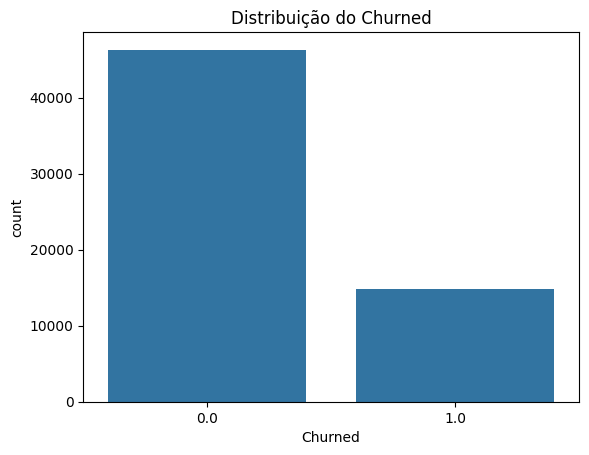

In [ ]:
# Gráfico de contagem da variável target (se o usuário cancelou ou não)
sns.countplot(data=Str, x='Churned')
plt.title('Distribuição do Churned')
plt.show()

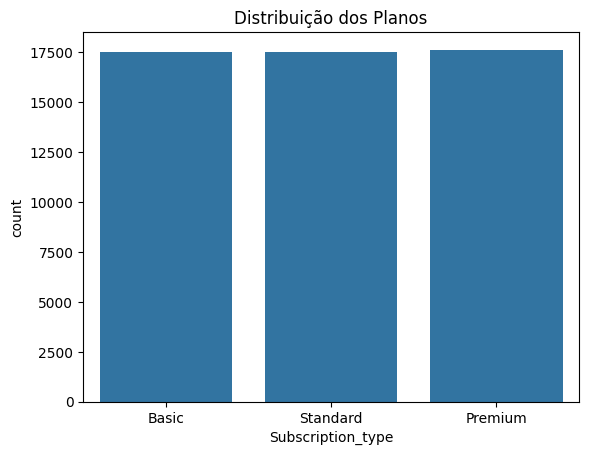

In [ ]:
# Verificando a distribuição dos planos
sns.countplot(data=Str, x='Subscription_type')
plt.title('Distribuição dos Planos')
plt.show()

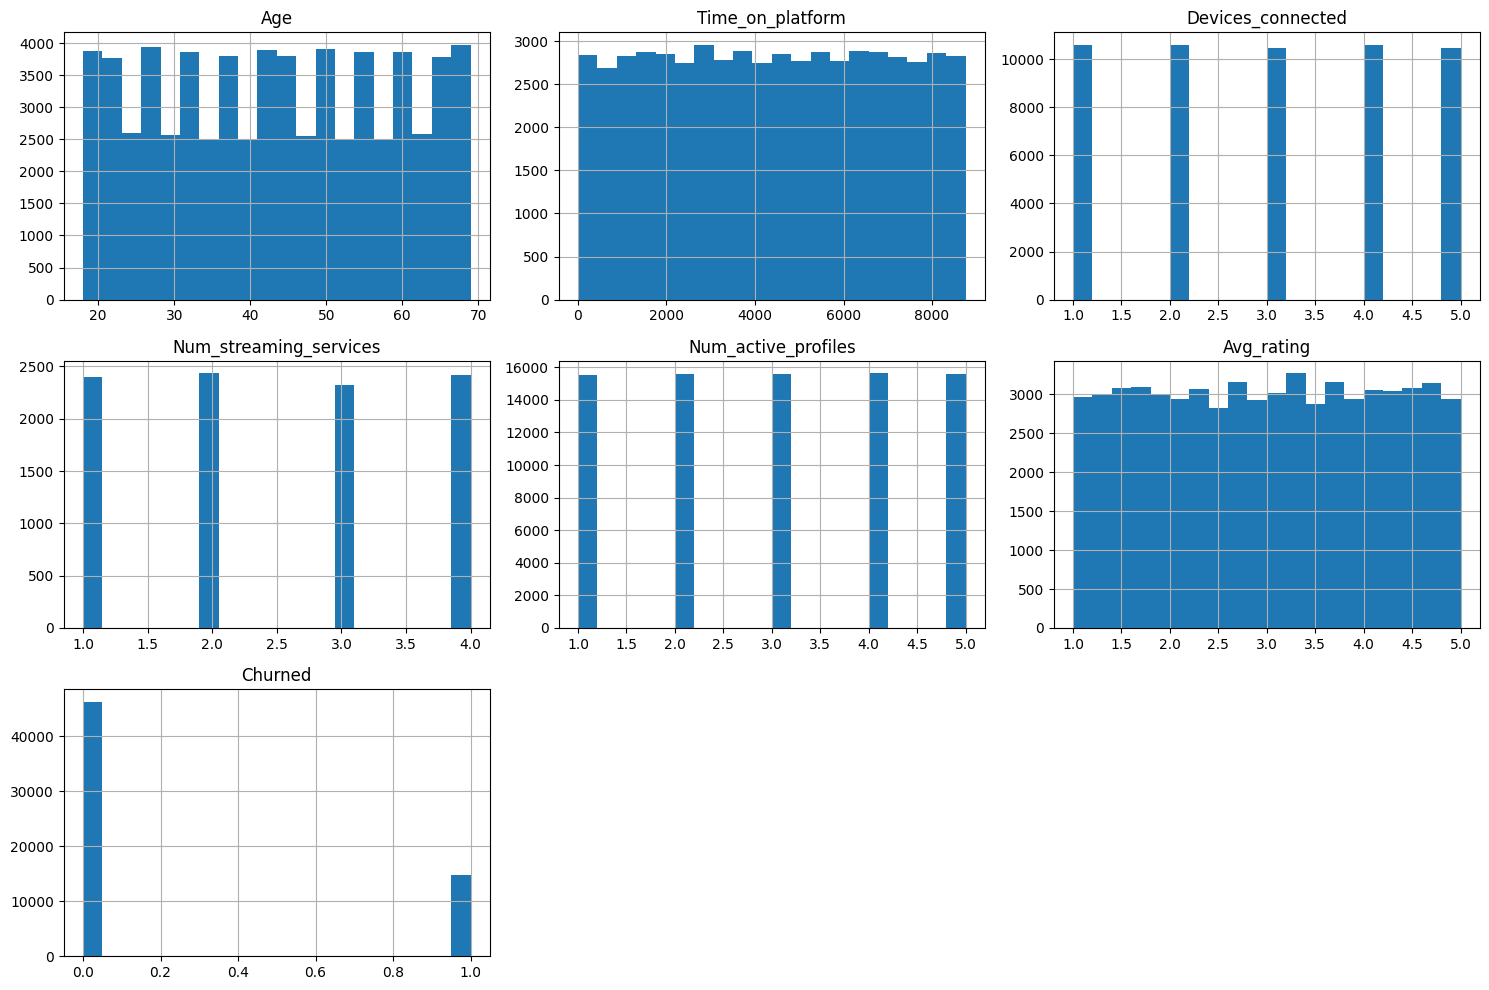

In [ ]:
# Histograma de todas as variáveis numéricas
Str.hist(bins=20, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

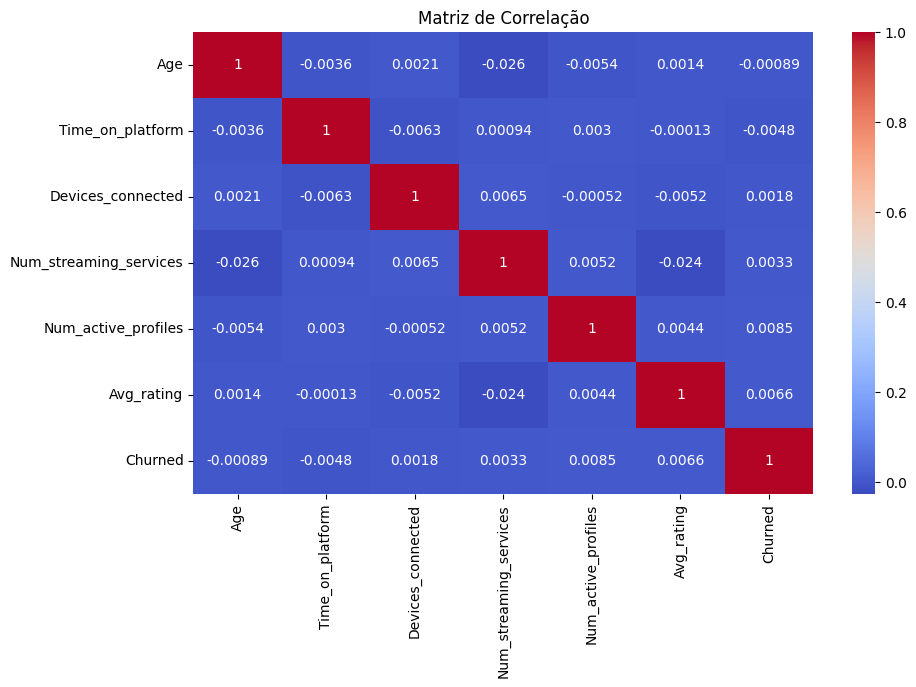

In [ ]:
# Matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(Str.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

##Etapa 02) Tratamento dos Dados (Data Preparation)

In [ ]:
# Substituir valores NaN por 0 nas colunas específicas
cols_fill_zero = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
Str[cols_fill_zero] = Str[cols_fill_zero].fillna(0)

In [ ]:
# Dropar linhas com valores nulos nas colunas Gender, Subscription_type e Age
Str = Str.dropna(subset=['Gender', 'Subscription_type', 'Age'])

In [ ]:
# Transformar valores 0 e 1 da coluna Churned em 'No' e 'Yes'
Str['Churned'] = Str['Churned'].replace({0: 'No', 1: 'Yes'})

<ipython-input-15-5dd1c958e868>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Str['Churned'] = Str['Churned'].replace({0: 'No', 1: 'Yes'})


In [ ]:
# Converter colunas float para inteiro (quando aplicável)
# Vamos converter apenas as colunas que realmente fazem sentido serem inteiras
cols_to_int = ['Time_on_platform', 'Num_streaming_services', 'Devices_connected', 'Age']
Str[cols_to_int] = Str[cols_to_int].astype(int)

<ipython-input-16-5b84042c74d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Str[cols_to_int] = Str[cols_to_int].astype(int)


In [ ]:
# Verificando se ainda há valores nulos
Str.isna().sum()

,0
Age,0
Gender,0
Time_on_platform,0
Devices_connected,0
Subscription_type,0
Num_streaming_services,0
Num_active_profiles,0
Avg_rating,0
Churned,0
User_id,0


In [ ]:
# Verificando os tipos de dados atualizados
Str.dtypes

,0
Age,int64
Gender,object
Time_on_platform,int64
Devices_connected,int64
Subscription_type,object
Num_streaming_services,int64
Num_active_profiles,int64
Avg_rating,float64
Churned,object
User_id,object


In [ ]:
# Visualizando os dados tratados
Str.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700,3,Basic,0,3,0.00,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,Female,6107,2,Standard,0,1,2.14,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44,Male,6374,3,Premium,1,1,1.91,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26,Male,0,5,Basic,0,2,0.00,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54,Male,3024,2,Basic,0,1,0.00,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


##Etapa 03) Modelagem dos Dados - Regressão Logística

In [ ]:
# Definir variáveis X e y
X = Str.drop(columns=['Churned'])
y = Str['Churned']

In [ ]:
# Codificar variáveis categóricas (LabelEncoder para binárias, get_dummies para múltiplas)
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Escalar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Criar e treinar o modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Fazer previsões
y_pred = model.predict(X_test)

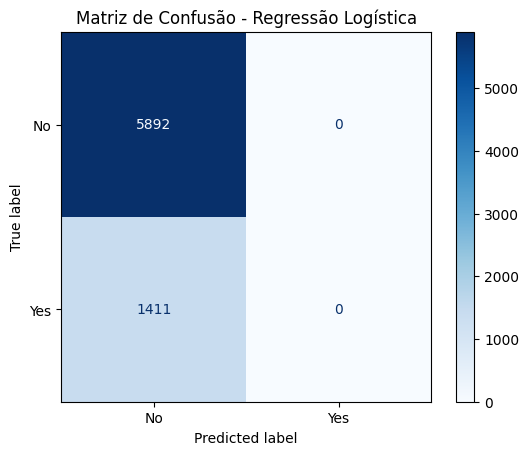

In [ ]:
# Plotar matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

In [ ]:
# Printar métricas
print("Métricas do Modelo - Regressão Logística:")
print(f"Acurácia : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisão : {precision_score(y_test, y_pred, pos_label='Yes'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred, pos_label='Yes'):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred, pos_label='Yes'):.4f}")

Métricas do Modelo - Regressão Logística:
Acurácia : 0.8068
Precisão : 0.0000
Recall   : 0.0000
F1-Score : 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Conclusão

Percebemos que o modelo teve a acurácia de 0.8 e zerou as outras métricas. Precisamso tunar o modelo para verificar o ganho que podemos obter.

##Etapa 04) Modelagem dos Dados - Tunning

In [ ]:
# Pré-processamento com get_dummies
X = Str.drop(columns=['Churned'])
y = Str['Churned']

In [ ]:
# LabelEncoder na variável target se estiver como texto
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

In [ ]:
# Codificando variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Definindo o modelo base e parâmetros para tuning
log_reg = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10],         # regularização
    'penalty': ['l2'],              # penalidade
    'solver': ['lbfgs', 'liblinear']  # otimizadores
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
# Recuperando o melhor modelo e parâmetros
best_model = grid_search.best_estimator_
melhores_parametros = best_model.get_params()

print("Melhores Hiperparâmetros encontrados:")
for k, v in melhores_parametros.items():
    if k in param_grid.keys():
        print(f"{k}: {v}")

Melhores Hiperparâmetros encontrados:
C: 10
penalty: l2
solver: lbfgs


In [ ]:
# Previsões
y_pred = best_model.predict(X_test)

In [ ]:
# Atualizando o DataFrame original com as predições usando .assign
Str = Str.drop(columns=['Predicted'], errors='ignore')
Str = Str.assign(Predicted=best_model.predict(scaler.transform(X)))

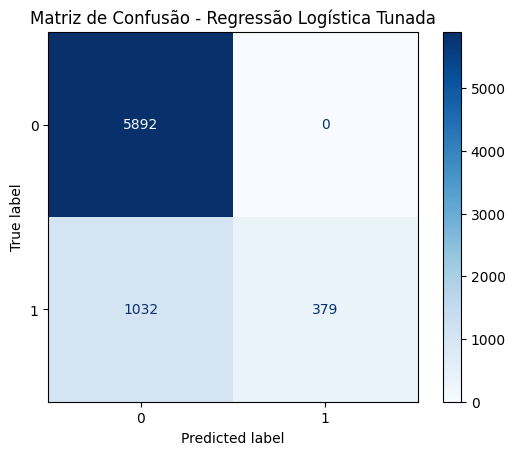

In [ ]:
# Matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística Tunada")
plt.show()

In [ ]:
# Métricas
print("🔍 Métricas - Modelo Tunado com GridSearchCV:")
print(f"Acurácia : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisão : {precision_score(y_test, y_pred, pos_label=1):.4f}") # Changed pos_label to 1
print(f"Recall   : {recall_score(y_test, y_pred, pos_label=1):.4f}") # Changed pos_label to 1
print(f"F1-Score : {f1_score(y_test, y_pred, pos_label=1):.4f}") # Changed pos_label to 1

🔍 Métricas - Modelo Tunado com GridSearchCV:
Acurácia : 0.8587
Precisão : 1.0000
Recall   : 0.2686
F1-Score : 0.4235


###Conclusão do Tunning

Percebemos que tivemos uma melhoria significativa após o processo no modelo, principalmente em relação à precisão.

##Etapa 05) Modelagem dos Dados - Random Forest

In [ ]:
# LabelEncoder para a variável target
le = LabelEncoder()
Str['Churned'] = le.fit_transform(Str['Churned'])  # "Yes" → 1, "No" → 0

<ipython-input-20-149a5bf14ace>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Str['Churned'] = le.fit_transform(Str['Churned'])  # "Yes" → 1, "No" → 0


In [ ]:
# Preparando X e y
X = Str.drop(columns=['Churned'])
y = Str['Churned']

In [ ]:
# Codificação das variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# 4. Escalonamento com MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Definindo o modelo base com menos árvores e profundidade controlada
model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,      # valor fixo e mais baixo
    max_depth=10,          # profundidade controlada
    min_samples_split=5,   # menos divisões, menos memória
    min_samples_leaf=2     # folhas maiores, árvores menores
)

# Grid enxuto para minimizar combinações
param_grid = {
    'max_depth': [5, 10],                  # sem o None
    'min_samples_split': [5],             # valor fixo
    'min_samples_leaf': [2]               # valor fixo
}

# GridSearch sem paralelismo agressivo
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=1   # uso de apenas 1 núcleo para preservar RAM
)

# Treinamento obrigatório
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                              min_samples_split=5,
                                              random_state=42),
             n_jobs=1,
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [2],
                         'min_samples_split': [5]},
             scoring='accuracy')

In [ ]:
# Previsões com .predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
# Adicionando as previsões ao DataFrame original com .assign
Str = Str.assign(Predicted=best_model.predict(scaler.transform(X)))

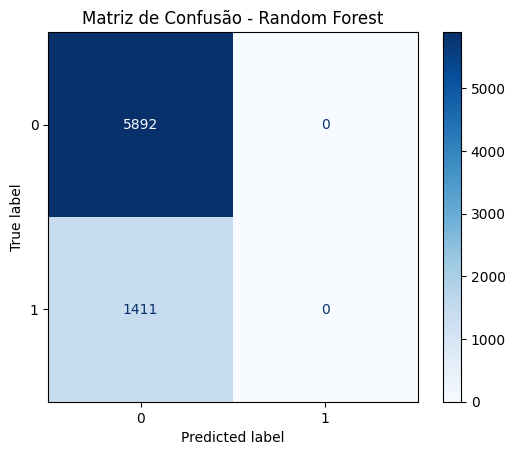

In [ ]:
# Matriz de Confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Matriz de Confusão - Random Forest")
plt.show()

In [ ]:
# Métricas
print("📊 Métricas - Random Forest com Str:")
print(f"Acurácia : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisão : {precision_score(y_test, y_pred):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred):.4f}")

📊 Métricas - Random Forest com Str:
Acurácia : 0.8068
Precisão : 0.0000
Recall   : 0.0000
F1-Score : 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
